**Algoritmo de Agrupamento Kmeans**

**Código baseado em:**

1) https://www.kaggle.com/code/khotijahs1/k-means-clustering-of-iris-dataset

2) https://realpython.com/k-means-clustering-python/

In [117]:
%pip install plotly --upgrade
%pip install kneed # To install only knee-detection algorithm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [118]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Ensure the kneed package is installed
%pip install kneed

from kneed import DataGenerator, KneeLocator #para mostrar o número de grupos ideal do agrupamento
from sklearn.cluster import KMeans #Importando a função Kmeans
from sklearn.preprocessing import StandardScaler #Função utilizada para normalização dos dados
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler #Função utilizada para normalização dos dados

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [119]:
import pandas as pd
base= pd.read_csv('Iris.csv', sep=',',encoding='cp1252')
base

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


QUESTÃO 01:

Número de outliers detectados: 4
Índices dos outliers: [32, 33, 60, 15]


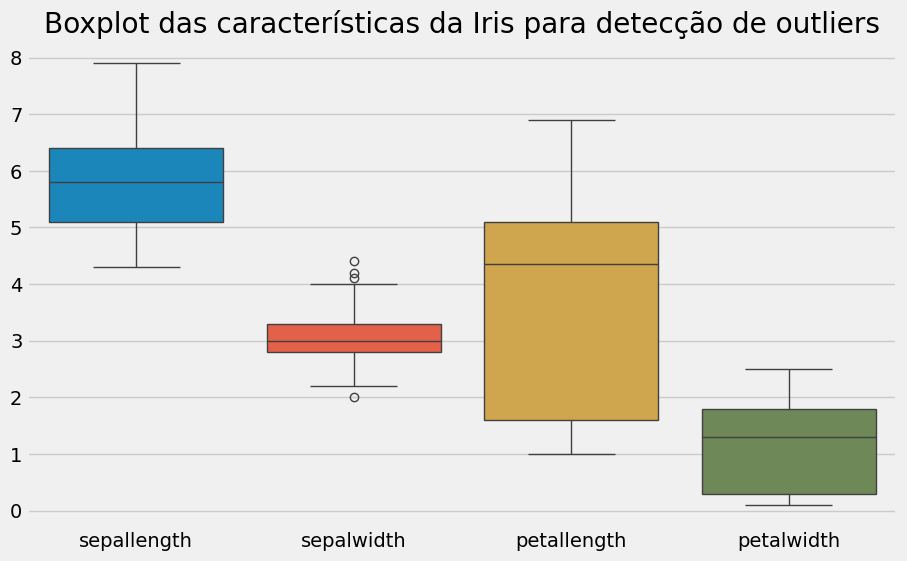

In [120]:
# Identificação de outliers usando IQR
def detect_outliers(df, features):
    outlier_indices = []
    
    for feature in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[feature], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[feature], 75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        # Append outliers
        outlier_indices.extend(outlier_list_col)
        
    # Count occurrences of each index
    outlier_indices = list(set(outlier_indices))
    
    return outlier_indices

# Aplicando a função
outliers = detect_outliers(base, base.columns[0:4])
print(f"Número de outliers detectados: {len(outliers)}")
print(f"Índices dos outliers: {outliers}")

# Visualização dos outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=base.iloc[:, 0:4])
plt.title('Boxplot das características da Iris para detecção de outliers')
plt.show()

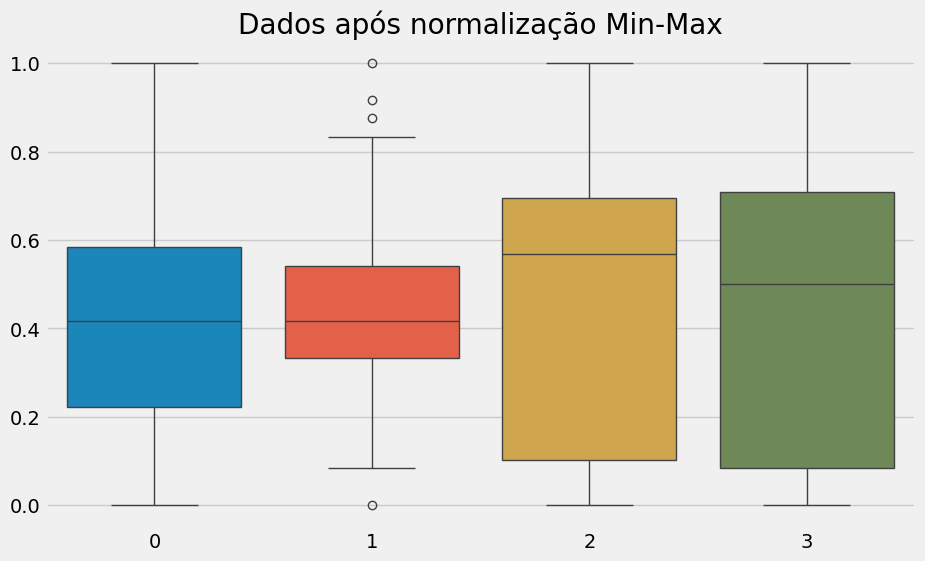

In [121]:
# Normalização Min-Max
scaler = MinMaxScaler()
Entrada_normalizada = scaler.fit_transform(Entrada)

# Visualização dos dados normalizados
plt.figure(figsize=(10,6))
sns.boxplot(data=Entrada_normalizada)
plt.title('Dados após normalização Min-Max')
plt.show()

QUESTÃO 02:

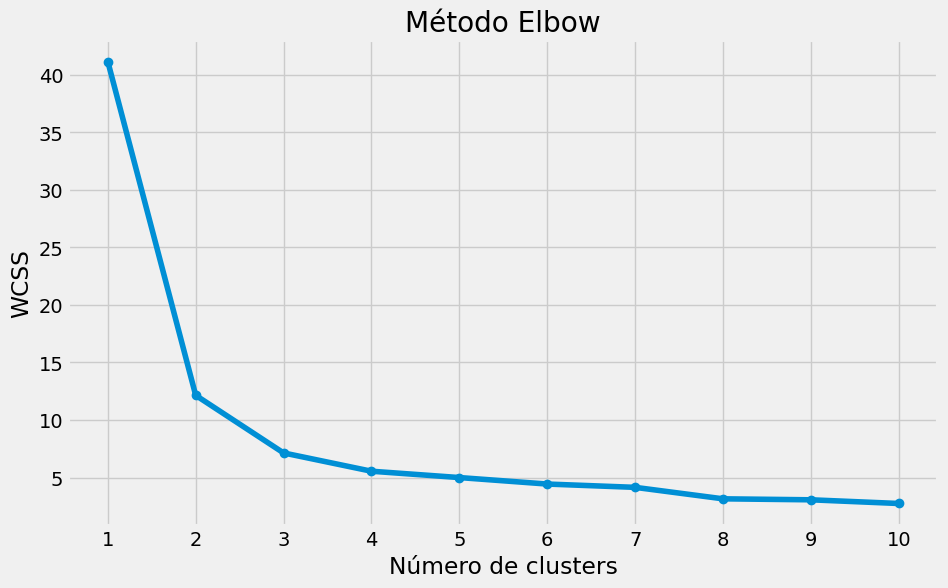

In [122]:
# Calculando WCSS para diferentes números de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=10)
    kmeans.fit(Entrada_normalizada)
    wcss.append(kmeans.inertia_)

# Plotando o método do cotovelo
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método Elbow')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.show()

Silhouette Score para k=2: 0.629
Silhouette Score para k=3: 0.482
Silhouette Score para k=4: 0.443
Silhouette Score para k=5: 0.422
Silhouette Score para k=6: 0.436
Silhouette Score para k=7: 0.446
Silhouette Score para k=8: 0.330
Silhouette Score para k=9: 0.294
Silhouette Score para k=10: 0.279


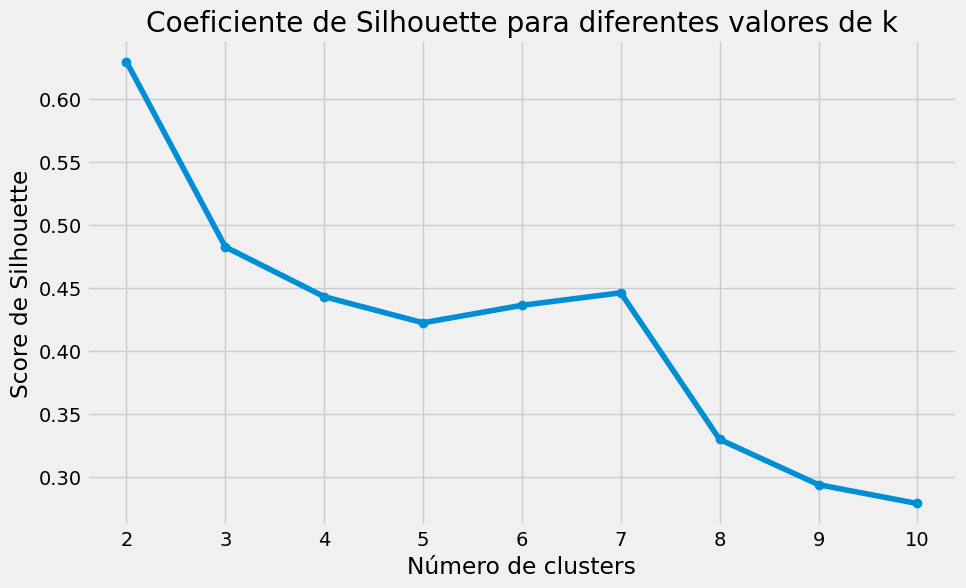

In [123]:
# Calculando o coeficiente de silhueta para diferentes números de clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    preds = kmeans.fit_predict(Entrada_normalizada)
    score = silhouette_score(Entrada_normalizada, preds)
    silhouette_scores.append(score)
    print(f'Silhouette Score para k={k}: {score:.3f}')

# Plotando os scores de silhueta
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Coeficiente de Silhouette para diferentes valores de k')
plt.xlabel('Número de clusters')
plt.ylabel('Score de Silhouette')
plt.xticks(range(2, 11))
plt.show()

Colunas disponíveis no DataFrame:
['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class']

Colunas após adicionar Cluster:
['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class', 'Cluster']

Colunas numéricas que serão usadas:
['sepallength', 'sepalwidth', 'petallength', 'petalwidth']

Médias por cluster (apenas características numéricas):
         sepallength  sepalwidth  petallength  petalwidth
Cluster                                                  
0           6.703846    3.063462     5.467308    1.976923
1           5.006000    3.418000     1.464000    0.244000
2           5.783333    2.664583     4.297917    1.350000


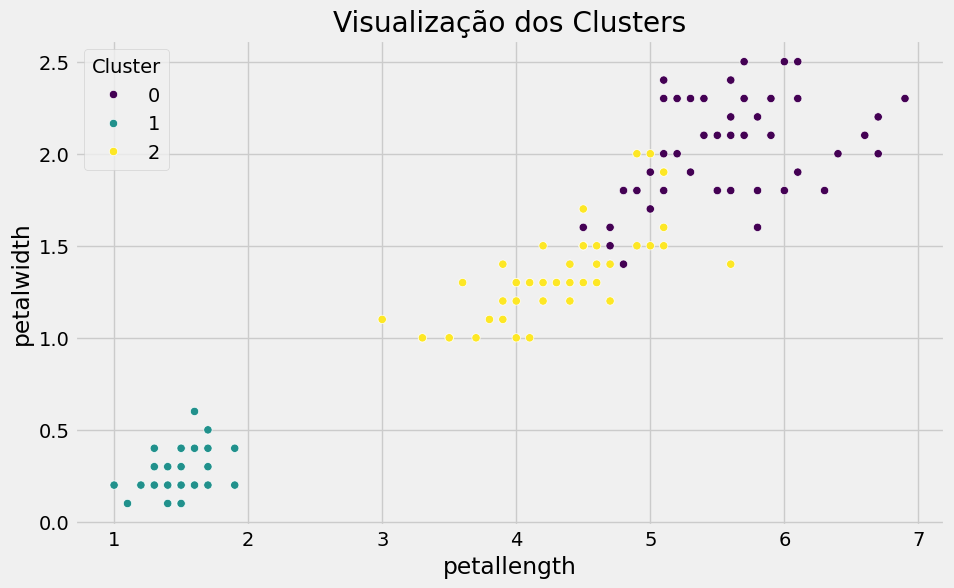

In [124]:
# Primeiro, vamos verificar os nomes exatos das colunas no DataFrame
print("Colunas disponíveis no DataFrame:")
print(base.columns.tolist())

# Aplicando K-means com k=3 (baseado nas métricas)
kmeans = KMeans(n_clusters=3, random_state=10)
saida_kmeans = kmeans.fit_predict(Entrada_normalizada)

# Adicionando os clusters ao dataframe original
base['Cluster'] = saida_kmeans

# Verificando novamente as colunas após adicionar 'Cluster'
print("\nColunas após adicionar Cluster:")
print(base.columns.tolist())

# Caracterizando os clusters - VERSÃO CORRIGIDA E ADAPTADA
# Vamos usar as colunas numéricas corretas
# Supondo que os nomes sejam (ajuste conforme a saída do print acima):
colunas_numericas = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']  # Exemplo - ajuste para seus nomes reais

# Alternativamente, podemos selecionar automaticamente as colunas numéricas
colunas_numericas = base.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Removendo 'Id' se existir (ajuste conforme necessário)
if 'Id' in colunas_numericas:
    colunas_numericas.remove('Id')
if 'Cluster' in colunas_numericas:
    colunas_numericas.remove('Cluster')

print("\nColunas numéricas que serão usadas:")
print(colunas_numericas)

cluster_means = base.groupby('Cluster')[colunas_numericas].mean()
print("\nMédias por cluster (apenas características numéricas):")
print(cluster_means)

# Visualização dos clusters
plt.figure(figsize=(10,6))
# Usando as colunas corretas para o gráfico
# Supondo que os nomes sejam petal_length e petal_width - ajuste conforme necessário
sns.scatterplot(x=colunas_numericas[2], y=colunas_numericas[3], hue='Cluster', data=base, palette='viridis')
plt.title('Visualização dos Clusters')
plt.show()

QUESTÃO 05:

Davies-Bouldin Index para k=2: 0.488
Davies-Bouldin Index para k=3: 0.787
Davies-Bouldin Index para k=4: 0.899
Davies-Bouldin Index para k=5: 0.993
Davies-Bouldin Index para k=6: 1.030
Davies-Bouldin Index para k=7: 0.935
Davies-Bouldin Index para k=8: 1.068
Davies-Bouldin Index para k=9: 1.196
Davies-Bouldin Index para k=10: 1.184


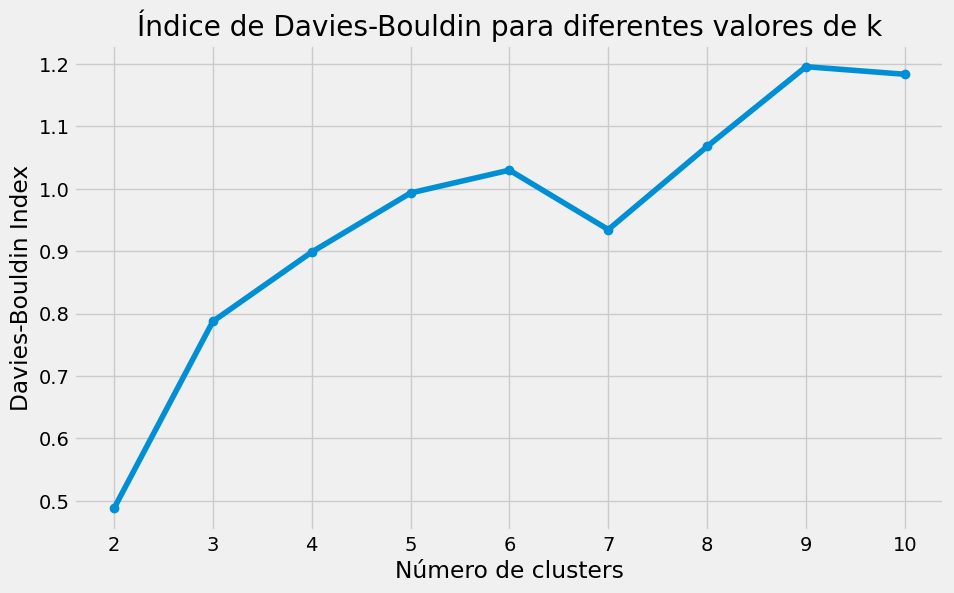

In [125]:
from sklearn.metrics import davies_bouldin_score

# Calculando o índice de Davies-Bouldin para diferentes números de clusters
db_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    preds = kmeans.fit_predict(Entrada_normalizada)
    score = davies_bouldin_score(Entrada_normalizada, preds)
    db_scores.append(score)
    print(f'Davies-Bouldin Index para k={k}: {score:.3f}')

# Plotando os scores
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), db_scores, marker='o')
plt.title('Índice de Davies-Bouldin para diferentes valores de k')
plt.xlabel('Número de clusters')
plt.ylabel('Davies-Bouldin Index')
plt.xticks(range(2, 11))
plt.show()

Questão 06:

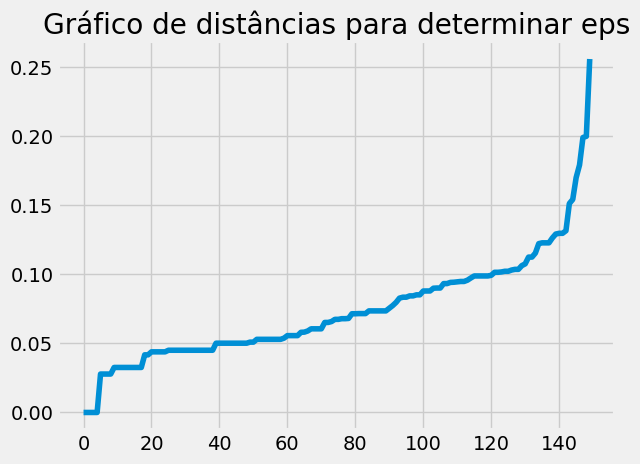

Número de clusters encontrados pelo DBSCAN: 2


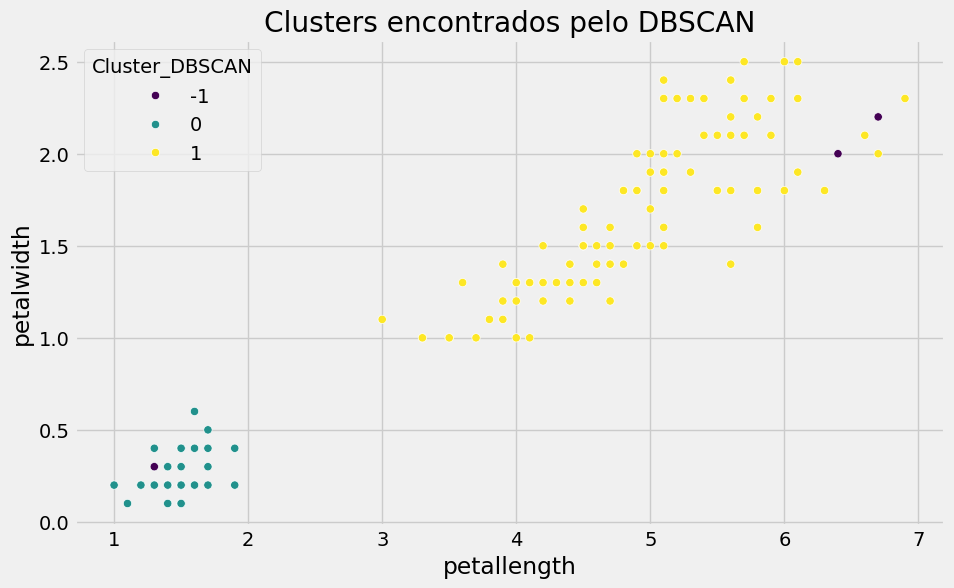

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


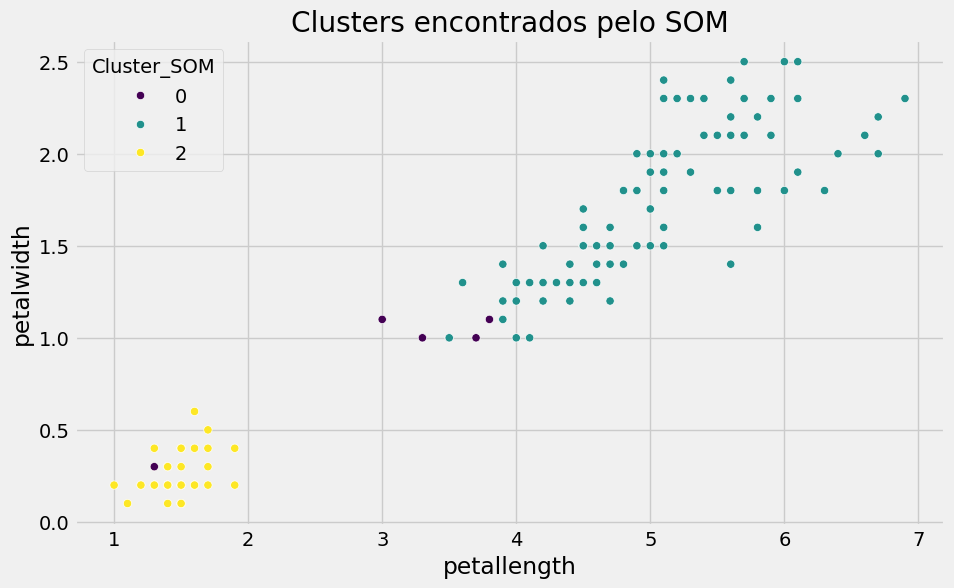

In [126]:
# Questão 6 - Versão corrigida com nomes de colunas corretos

# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Determinando um valor adequado para eps
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(Entrada_normalizada)
distances, indices = nbrs.kneighbors(Entrada_normalizada)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('Gráfico de distâncias para determinar eps')
plt.show()

# Aplicando DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
saida_dbscan = dbscan.fit_predict(Entrada_normalizada)

# Adicionando os clusters ao dataframe
base['Cluster_DBSCAN'] = saida_dbscan

# Número de clusters encontrados
n_clusters_dbscan = len(set(saida_dbscan)) - (1 if -1 in saida_dbscan else 0)
print(f"Número de clusters encontrados pelo DBSCAN: {n_clusters_dbscan}")

# Visualização usando os nomes corretos das colunas
plt.figure(figsize=(10,6))
sns.scatterplot(x='petallength', y='petalwidth', hue='Cluster_DBSCAN', data=base, palette='viridis')
plt.title('Clusters encontrados pelo DBSCAN')
plt.show()

# SOM (Self-Organizing Maps)
%pip install minisom
from minisom import MiniSom

# Criando e treinando o SOM
som = MiniSom(x=3, y=1, input_len=4, sigma=0.3, learning_rate=0.5)
som.random_weights_init(Entrada_normalizada)
som.train_random(Entrada_normalizada, 100)

# Obtendo os clusters
saida_som = np.array([som.winner(x)[0] for x in Entrada_normalizada])

# Adicionando ao dataframe
base['Cluster_SOM'] = saida_som

# Visualização usando nomes corretos
plt.figure(figsize=(10,6))
sns.scatterplot(x='petallength', y='petalwidth', hue='Cluster_SOM', data=base, palette='viridis')
plt.title('Clusters encontrados pelo SOM')
plt.show()

Questão 07:

Colunas disponíveis:
['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class', 'Cluster', 'Cluster_DBSCAN', 'Cluster_SOM']

Matriz de confusão (numérica):
[[ 0 50  0]
 [10  0 40]
 [42  0  8]]

Mapeamento das classes:
0: Iris-setosa
1: Iris-versicolor
2: Iris-virginica


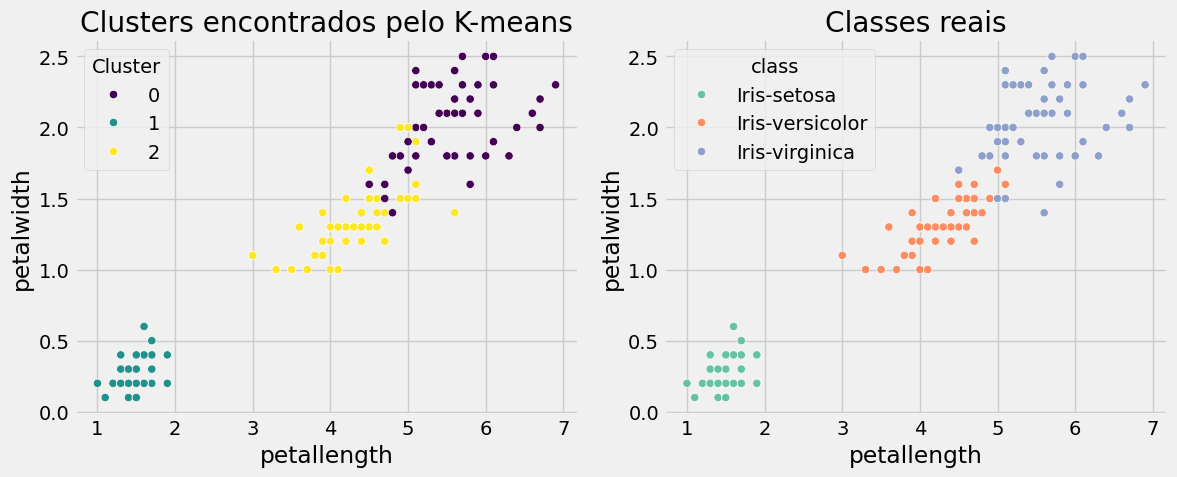


Distribuição de classes em cada cluster:
class    Iris-setosa  Iris-versicolor  Iris-virginica
Cluster                                              
0                NaN             10.0            42.0
1               50.0              NaN             NaN
2                NaN             40.0             8.0

Mapeamento cluster-classe:
{np.int32(0): 'Iris-virginica', np.int32(1): 'Iris-setosa', np.int32(2): 'Iris-versicolor'}

Acurácia: 88.00%


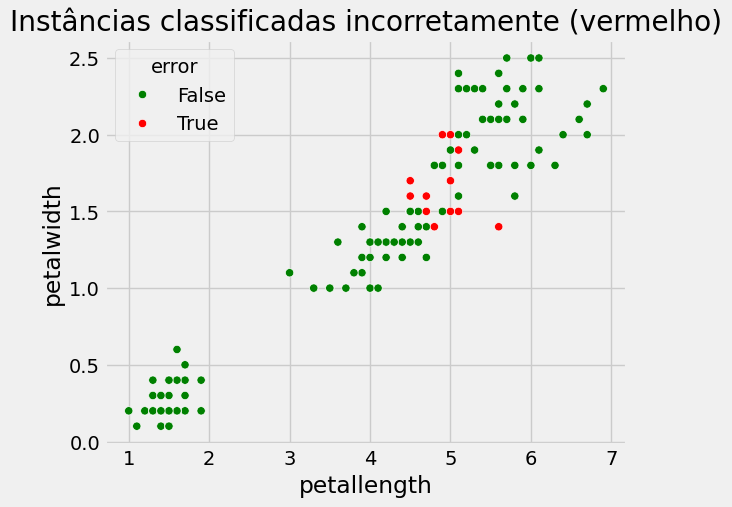

In [127]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. Verificar as colunas disponíveis
print("Colunas disponíveis:")
print(base.columns.tolist())

# 2. Converter as classes de string para números
le = LabelEncoder()
base['class_num'] = le.fit_transform(base['class'])

# 3. Matriz de confusão usando valores numéricos
cm = confusion_matrix(base['class_num'], base['Cluster'])
print("\nMatriz de confusão (numérica):")
print(cm)

# 4. Mostrar o mapeamento das classes
print("\nMapeamento das classes:")
for i, class_name in enumerate(le.classes_):
    print(f"{i}: {class_name}")

# 5. Visualização dos clusters vs classes reais
plt.figure(figsize=(12, 5))

# Gráfico 1: Clusters encontrados
plt.subplot(1, 2, 1)
sns.scatterplot(x='petallength', y='petalwidth', hue='Cluster', data=base, palette='viridis')
plt.title('Clusters encontrados pelo K-means')

# Gráfico 2: Classes reais
plt.subplot(1, 2, 2)
sns.scatterplot(x='petallength', y='petalwidth', hue='class', data=base, palette='Set2')
plt.title('Classes reais')

plt.tight_layout()
plt.show()

# 6. Análise de correspondência entre clusters e classes
cluster_class_dist = base.groupby(['Cluster', 'class']).size().unstack()
print("\nDistribuição de classes em cada cluster:")
print(cluster_class_dist)

# 7. Calculando a acurácia com mapeamento automático
cluster_to_class = {}
for cluster in sorted(base['Cluster'].unique()):
    mask = base['Cluster'] == cluster
    class_mode = base[mask]['class'].mode()[0]  # Corrigido para pandas mode()
    cluster_to_class[cluster] = class_mode

print("\nMapeamento cluster-classe:")
print(cluster_to_class)

# Calcular acurácia
base['predicted_class'] = base['Cluster'].map(cluster_to_class)
correct = sum(base['predicted_class'] == base['class'])
accuracy = correct / len(base)
print(f"\nAcurácia: {accuracy:.2%}")

# Visualização dos erros
base['error'] = base['predicted_class'] != base['class']
plt.figure(figsize=(6, 5))
sns.scatterplot(x='petallength', y='petalwidth', hue='error', data=base, palette={True: 'red', False: 'green'})
plt.title('Instâncias classificadas incorretamente (vermelho)')
plt.show()

In [128]:
Entrada = base.iloc[:, 0:4].values
Entrada.shape

(150, 4)

In [129]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
Entrada = scaler.fit_transform(Entrada)

In [130]:
Entrada

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

Para analisar Silhouette:
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [131]:
# Determinando a Silhouette para número máximo de cluster estimado (Raiz(instâncias/2)
limit = int((Entrada.shape[0]//2)**0.5)
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(Entrada)
    pred = model.predict(Entrada)
    score = silhouette_score(Entrada, pred)
    print('Silhouette Score k = {}: {:<.3f}'.format(k, score))

Silhouette Score k = 2: 0.629
Silhouette Score k = 3: 0.482
Silhouette Score k = 4: 0.445
Silhouette Score k = 5: 0.351
Silhouette Score k = 6: 0.430
Silhouette Score k = 7: 0.319
Silhouette Score k = 8: 0.331


**WCSS - Within Clusters Sum of Squares = é a soma dos quadrados dentro dos clusters**
https://rpubs.com/diascodes/770518

Veja: https://en.wikipedia.org/wiki/Elbow_method_(clustering)

In [132]:
wcss = []
for i in range(2, 11):
  #print(i)
  kmeans = KMeans(n_clusters=i, random_state=10)
  kmeans.fit(Entrada)
  wcss.append(kmeans.inertia_)

**Usando o método Elbow para encontrar o número ideal de clusters**

In [133]:
wcss

[12.143688281579719,
 7.138647703985377,
 5.549759171192483,
 4.999716015487786,
 4.435974100749334,
 4.148564120879137,
 3.152308877970635,
 3.0668244428901104,
 2.7463599552773736]

**Vamos analisar o ponto de inflexão dessa curva?**

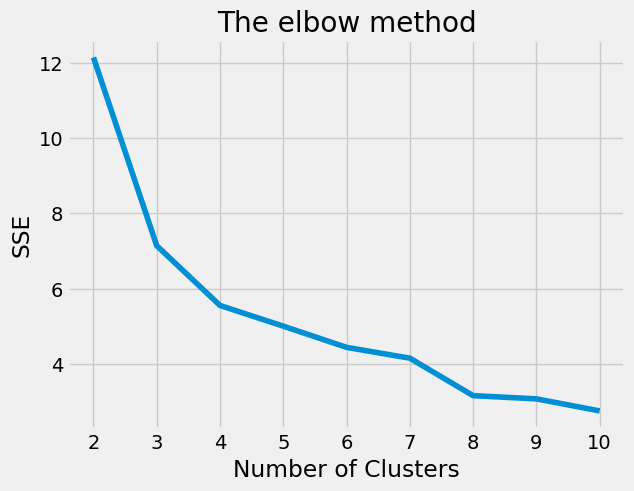

In [134]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), wcss)
plt.xticks(range(2, 11))
plt.title('The elbow method')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [135]:
kl = KneeLocator(range(2, 11), wcss, curve="convex", direction="decreasing")
kl.elbow

np.int64(4)

In [136]:
#K-means++ é um método de otimização de centroide para ajudar o modelo a convergir mais rapidamente
kmeans = KMeans(n_clusters=3, random_state=0)
#kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
saida_kmeans = kmeans.fit_predict(Entrada)

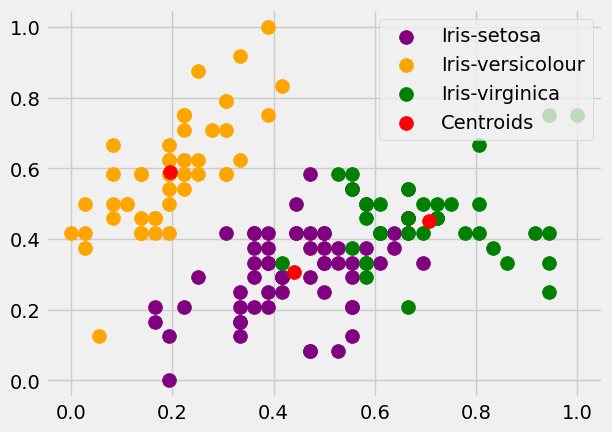

In [137]:
#Visualising the clusters
plt.scatter(Entrada[saida_kmeans == 0, 0], Entrada[saida_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(Entrada[saida_kmeans == 1, 0], Entrada[saida_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(Entrada[saida_kmeans == 2, 0], Entrada[saida_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()